In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
ds= pd.read_csv("watson_report.csv", encoding_errors='ignore') #loading the datset using pandas


In [3]:
ds

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [4]:
ds.head(5) #to display first five rows of the dataset

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
ds.tail(5) #to display last five rows of the dataset

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8
1675,1152329,27,No,Travel_Rarely,511,Cardiology,2,2,Medical,1,...,2,80,0,9,5,2,8,7,0,7


In [6]:
ds.info() #to get the short summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [ ]:
ds.isnull().sum()   #Checking any missing values in the dataframe

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
ds.shape   #to get the number of rows and columns

(1676, 35)

In [8]:
ds = ds.dropna()

In [9]:
print("Dataset Shape after removing null values:", ds.shape)

Dataset Shape after removing null values: (1676, 35)


In [10]:
ds.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID'], axis = 1, inplace = True)  #ropping these columns helps focus the analysis on features that truly influence the target variable (Attrition)
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [11]:
def categorize_columns(dataframe, target_column):

    # Identify numerical columns
    numerical_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numerical_columns = [col for col in numerical_columns if col != target_column]

    # Identify categorical columns
    categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
    categorical_columns += [col for col in dataframe.columns if col not in numerical_columns and col != target_column]

    return numerical_columns, categorical_columns


# Use the function on the dataset
num_cols, cat_cols = categorize_columns(ds, target_column='Attrition')

# Print the results to confirm
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [12]:
ds[num_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,800.557876,9.221957,2.907518,2.714797,65.470167,2.724940,2.066826,2.738663,6516.512530,...,3.150358,2.718377,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,9.129126,401.594438,8.158118,1.025835,1.097534,20.207572,0.714121,1.113423,1.104005,4728.456618,...,0.357529,1.078162,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2928.250000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.500000,7.000000,3.000000,3.000000,65.500000,3.000000,2.000000,3.000000,4899.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8380.250000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


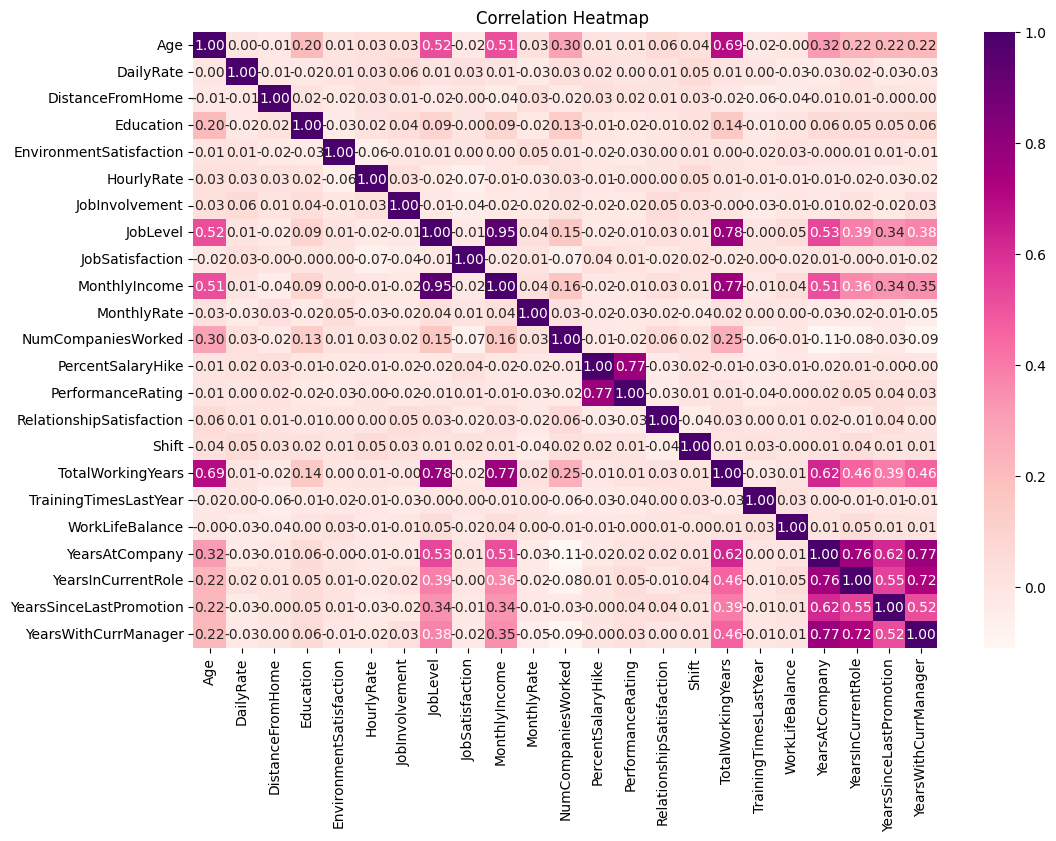

In [13]:
# Convert categorical columns to numeric using one-hot encoding or label encoding
ds_numeric = ds.select_dtypes(include=['number'])  # Keep only numeric columns

# Alternatively, convert categorical columns explicitly if needed
# df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
# df['BusinessTravel'] = df['BusinessTravel'].astype('category').cat.codes
# Repeat similar encoding for other categorical columns if required.

# Calculate the correlation matrix
correlation_matrix = ds_numeric.corr()



plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdPu', cbar=True)
plt.title('Correlation Heatmap ')
plt.show()





/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_93603/403570579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


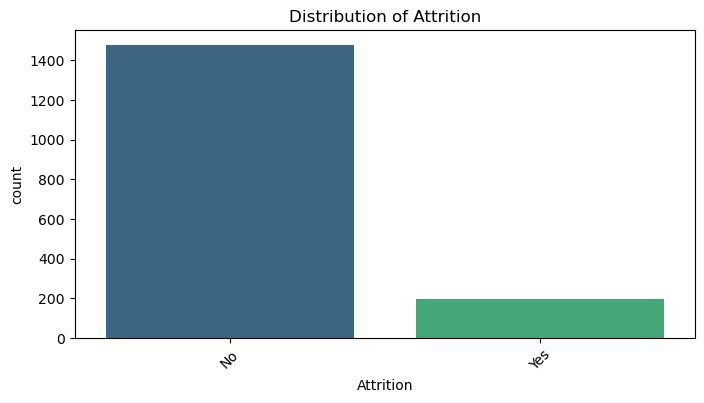

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_93603/403570579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


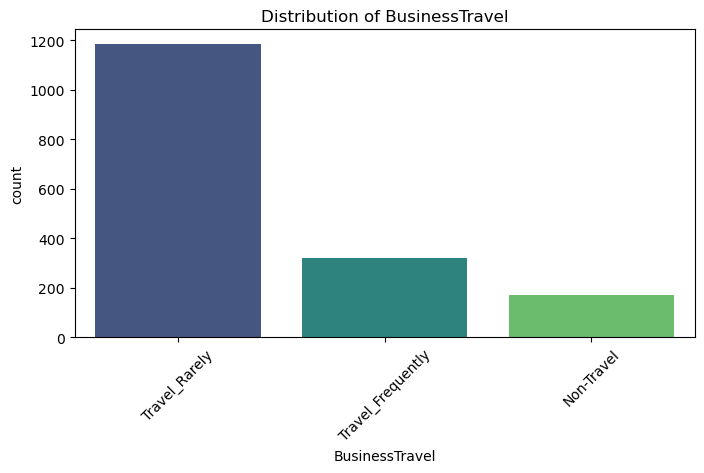

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_93603/403570579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


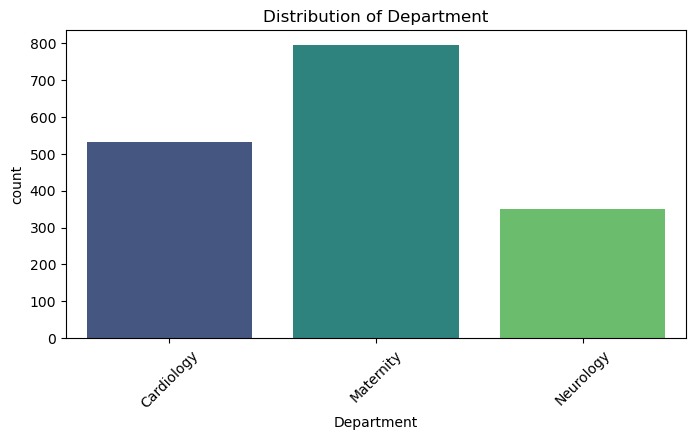

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_93603/403570579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


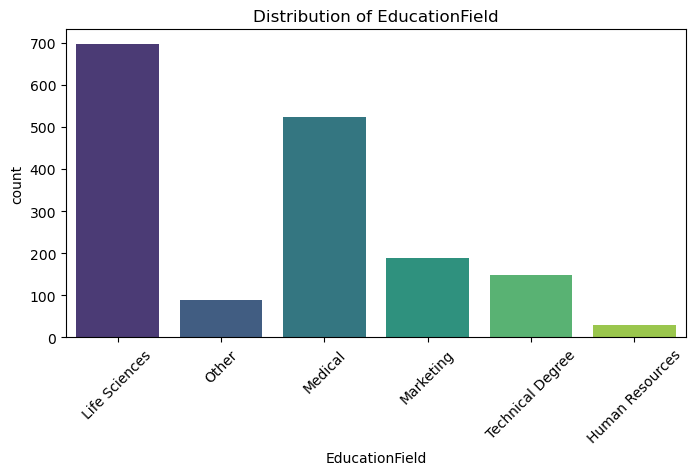

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_93603/403570579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


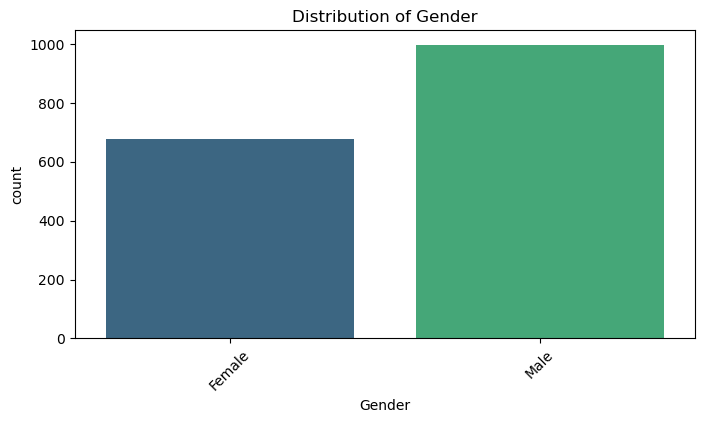

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_93603/403570579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


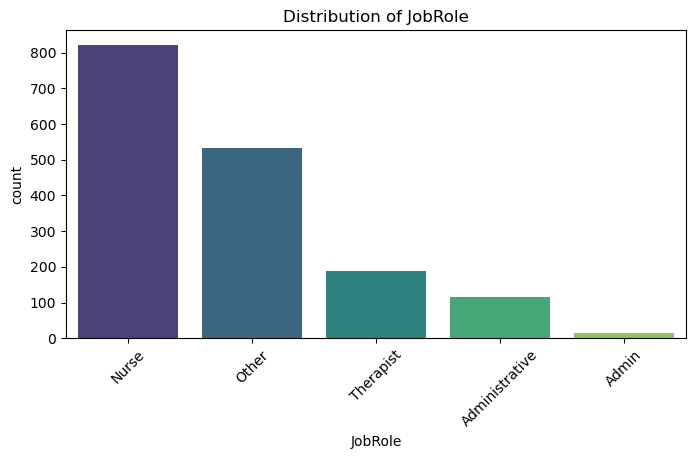

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_93603/403570579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


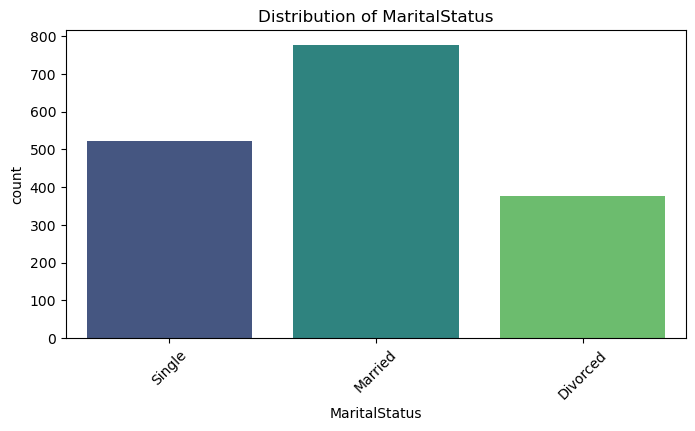

/var/folders/cn/lkkp822n0s72nd1skbywc23c0000gn/T/ipykernel_93603/403570579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ds, x=col, palette="viridis")


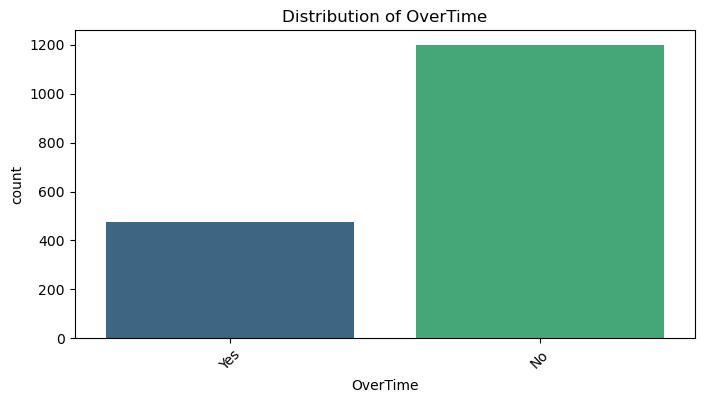

In [ ]:
# Count plots for categorical features
categorical_columns = ds.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=ds, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


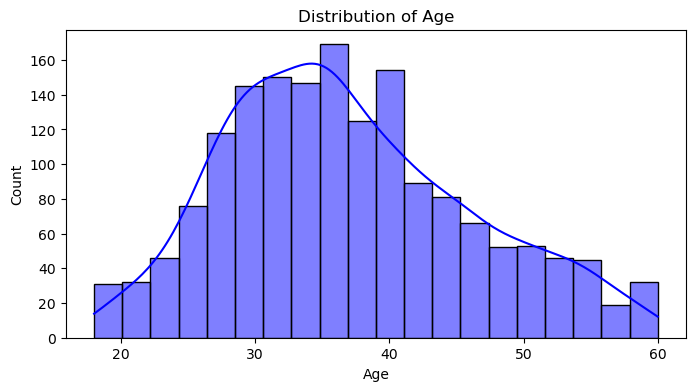

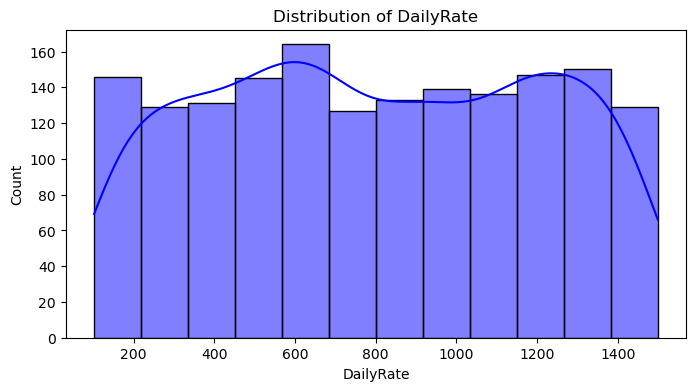

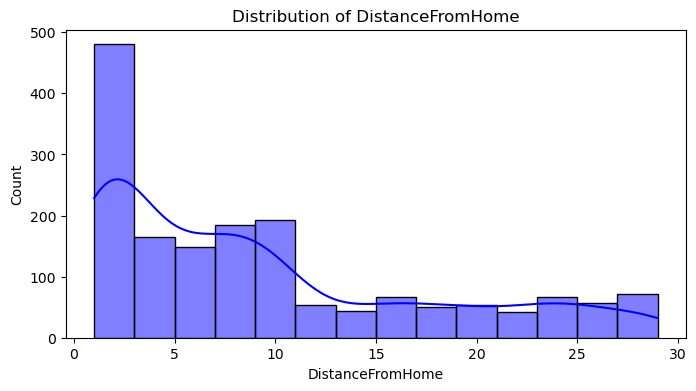

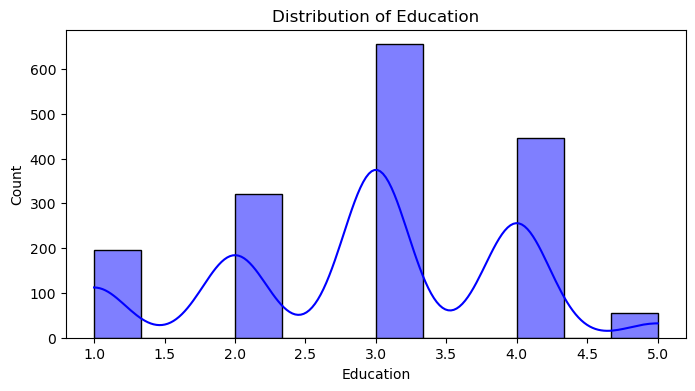

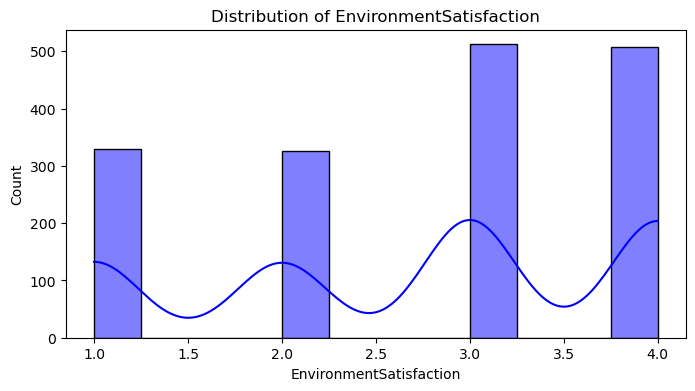

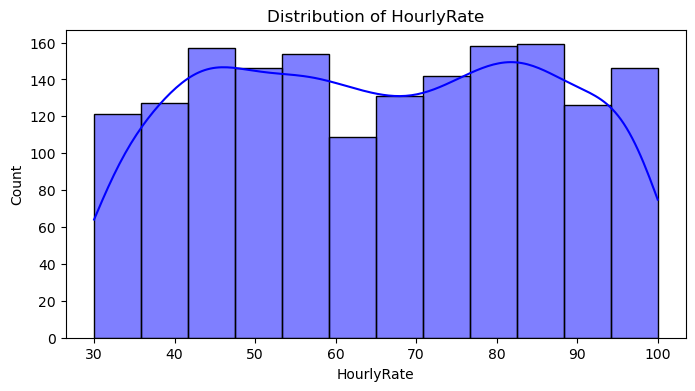

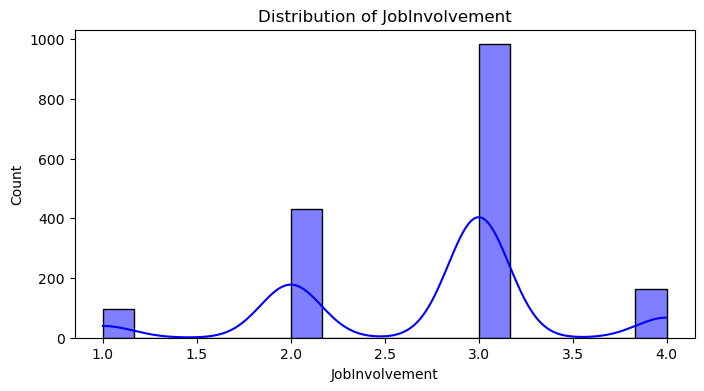

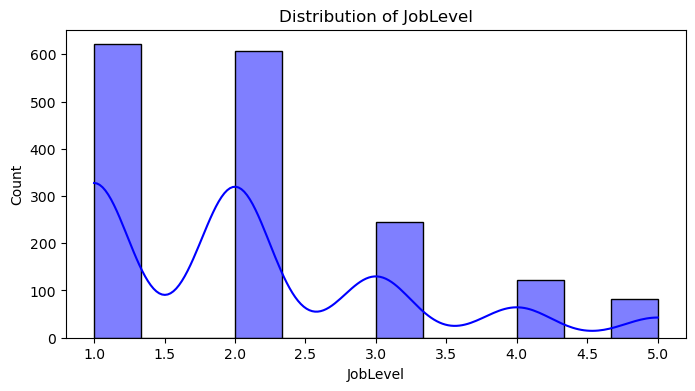

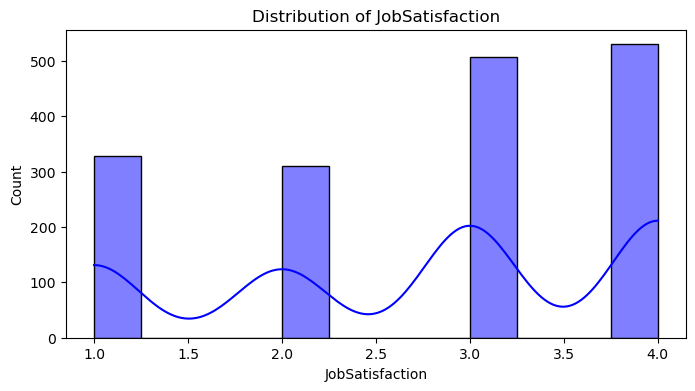

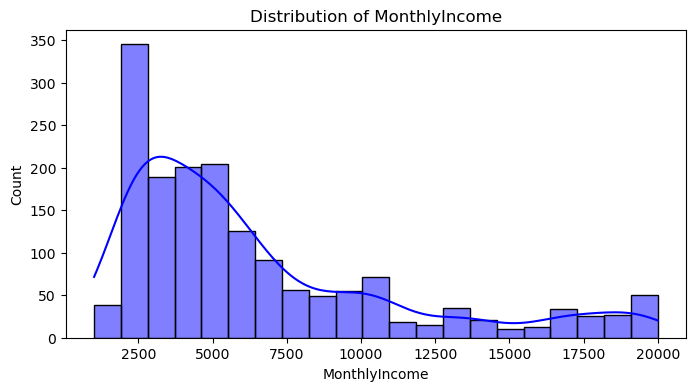

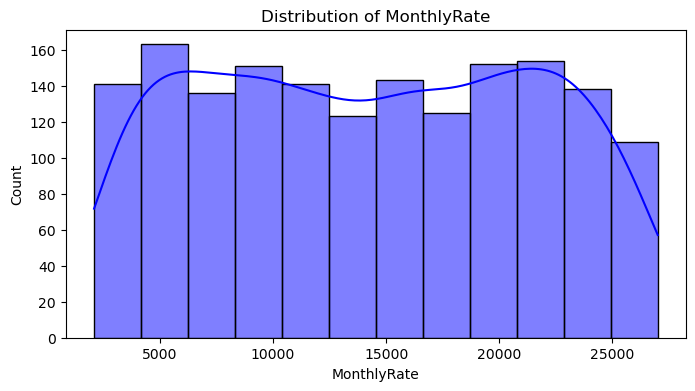

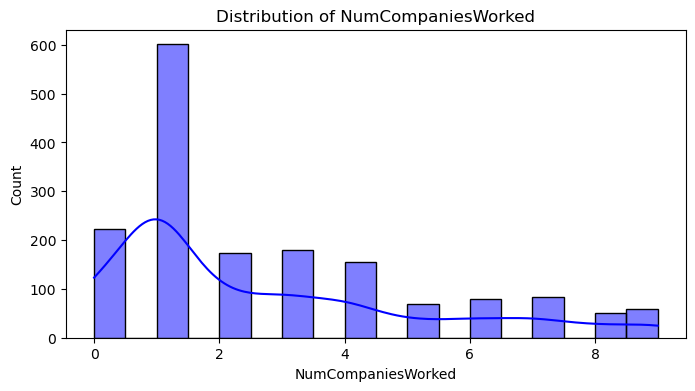

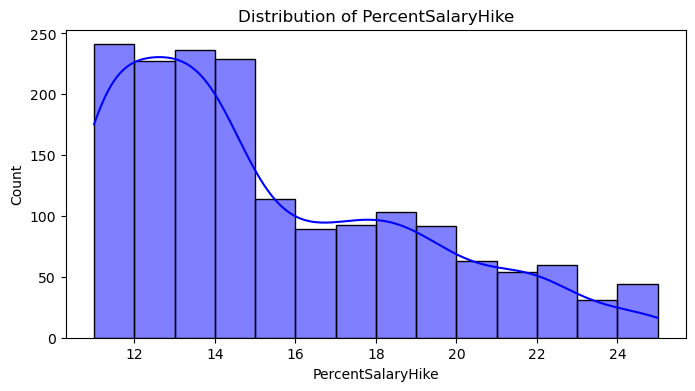

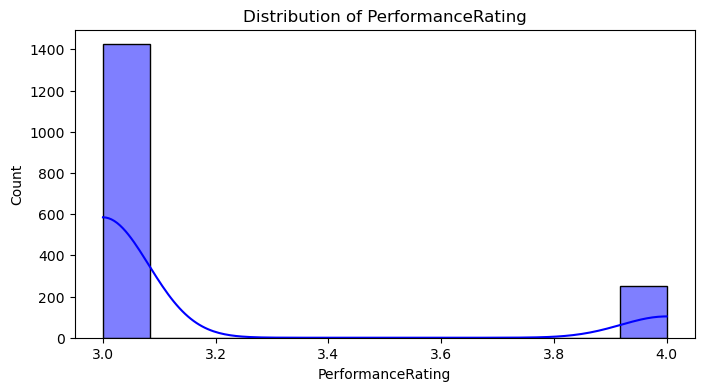

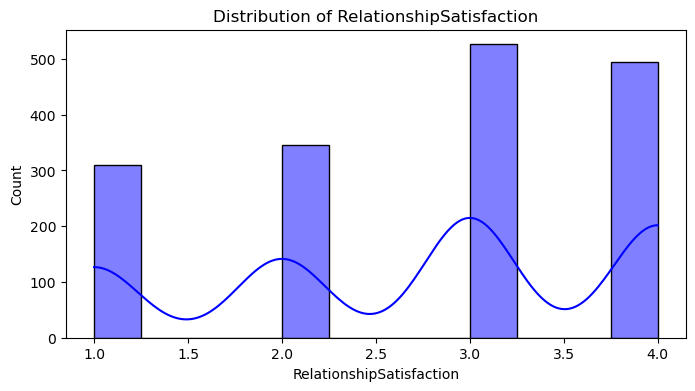

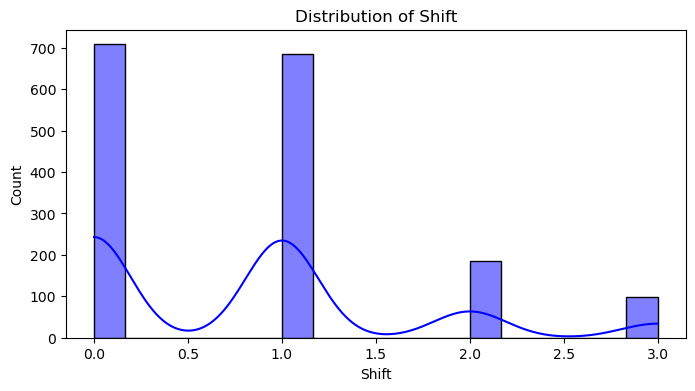

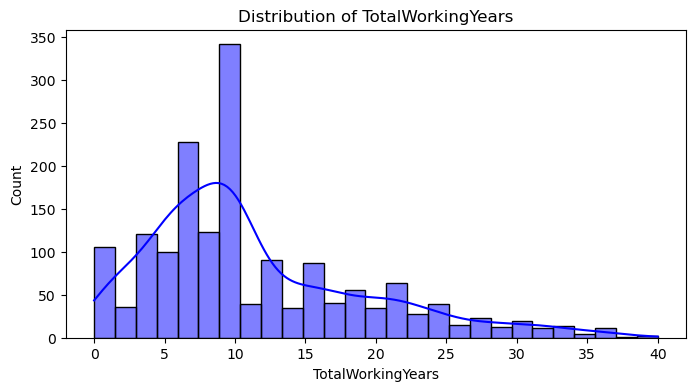

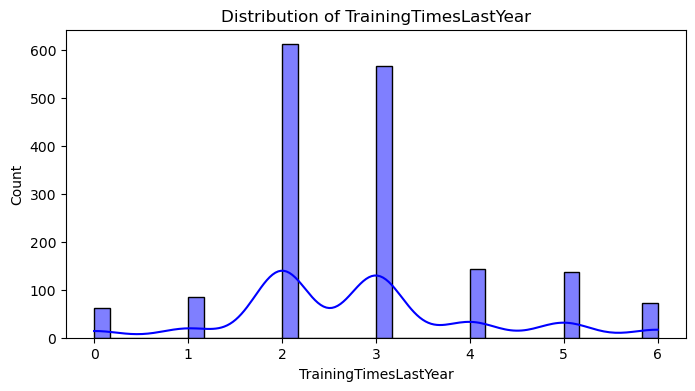

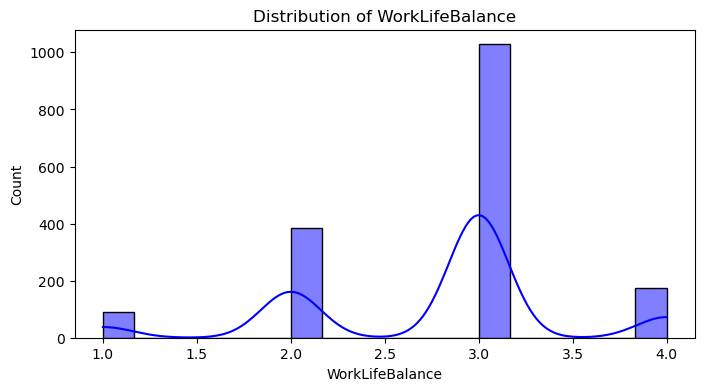

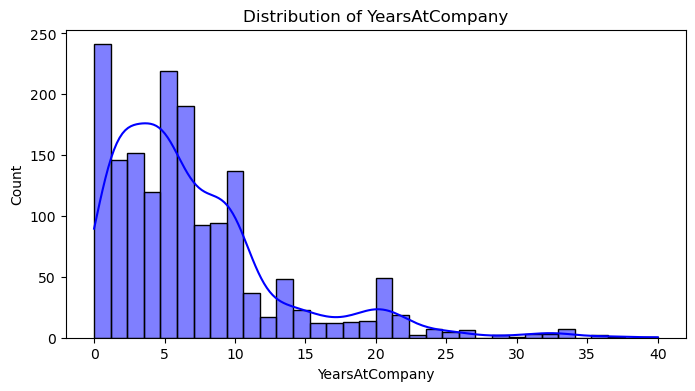

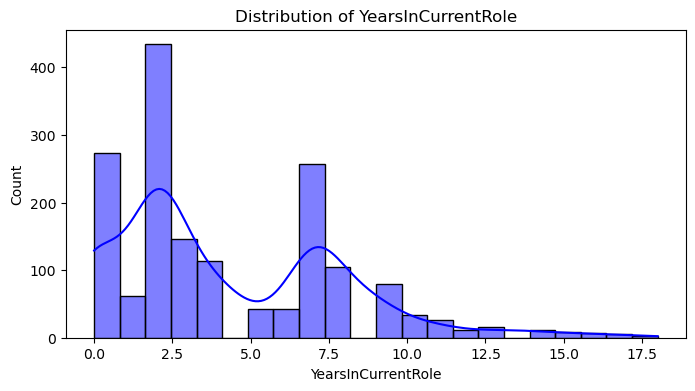

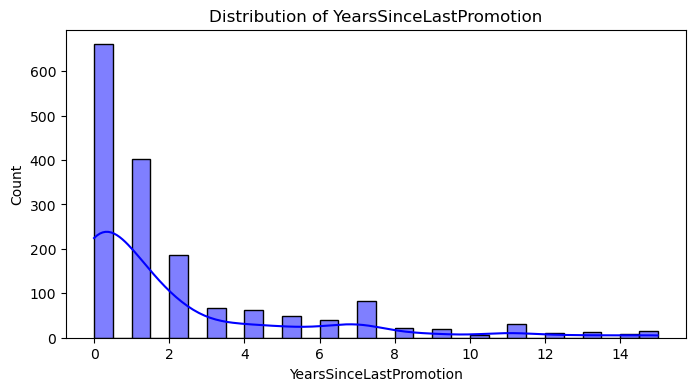

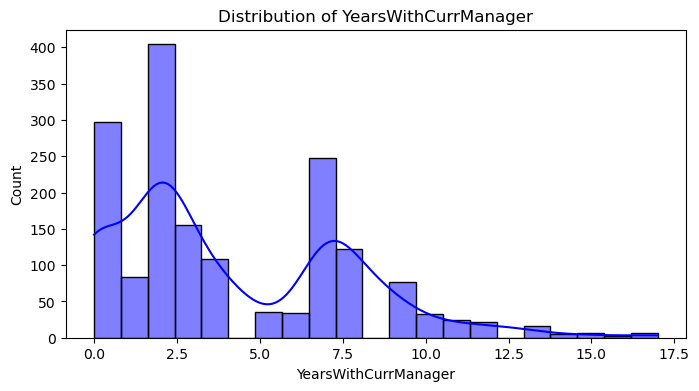

In [ ]:
# Histograms for numerical columns
numerical_columns = ds.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=ds, x=col, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Encode categorical variables in the dataset
ds_encoded = ds.copy()
for column in ds_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    ds_encoded[column] = le.fit_transform(ds_encoded[column])

In [36]:
from sklearn.svm import SVC

# Store results for SVM
svm_results = []

# Test different test sizes with SVM
for test_size in test_sizes:
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize and train the SVM model
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train, y_train)

    # Predict and calculate accuracies
    train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

    svm_results.append({
        'Test Size': test_size,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Convert SVM results to a DataFrame
svm_results_df = pd.DataFrame(svm_results)
svm_results_df



,Test Size,Train Accuracy,Test Accuracy
0,0.1,0.886605,0.833333
1,0.2,0.886567,0.860119
2,0.3,0.893436,0.852883
3,0.4,0.893532,0.862891
4,0.5,0.891408,0.871122


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define different test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
results = {}

X = ds_encoded.drop(columns=['Attrition'])  # Features
y = ds_encoded['Attrition']  # Target variable

# Store results
results = []
train_accuracy = []  # Store training accuracies for each test size
test_accuracy = []   # Store testing accuracies for each test size


# Test different test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

for test_size in test_sizes:
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict and calculate accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results.append({
        'Test Size': test_size,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df






,Test Size,Train Accuracy,Test Accuracy
0,0.1,0.996684,0.880952
1,0.2,0.997761,0.892857
2,0.3,1.000000,0.882704
3,0.4,1.000000,0.886736
4,0.5,1.000000,0.900955


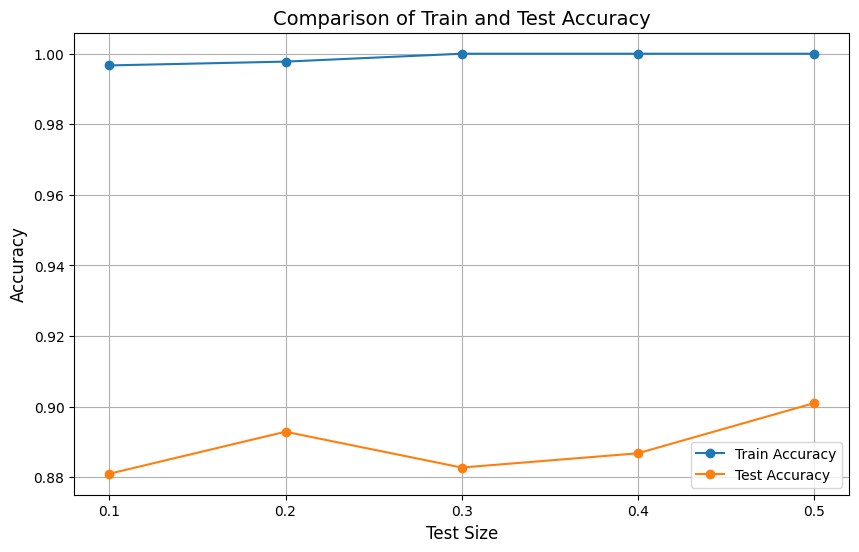

In [31]:
# Plotting the comparison
plt.figure(figsize=(10, 6))

# Use train_accuracies and test_accuracies instead of single values
plt.plot(test_sizes, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(test_sizes, test_accuracies, marker='o', label='Test Accuracy')

# Adding labels, title, and legend
plt.title('Comparison of Train and Test Accuracy', fontsize=14)
plt.xlabel('Test Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(test_sizes)  # Set x-axis ticks to the test sizes
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


In [37]:
# Redefine best test size (using previous result)
best_test_size = 0.1

# Redefine dataset split with best test size
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=best_test_size, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on validation set using the best parameters
best_rf_model = grid_search.best_estimator_
y_val_pred = best_rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

best_params, best_score, val_accuracy

Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 50},
 0.9084840228219,
 0.9139072847682119)

In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation accuracy
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std



(0.9158848614072495, 0.015971558319874193)

In [39]:
from sklearn.metrics import roc_auc_score
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_proba)

auc_roc_score


0.8666666666666667

In [40]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score


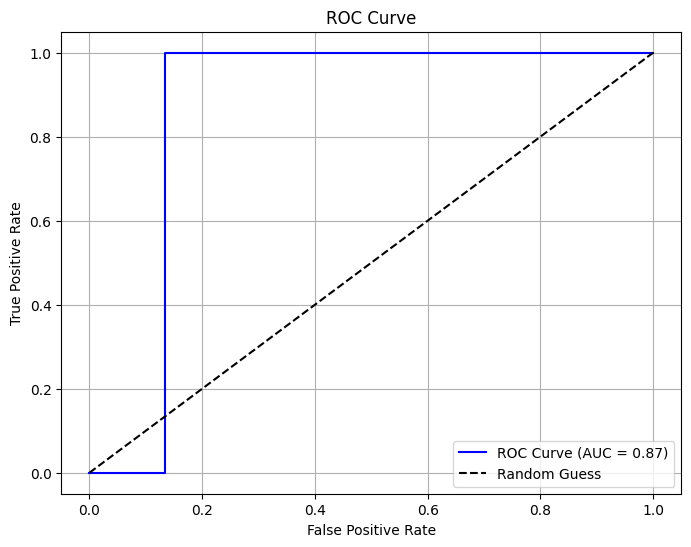

In [43]:
# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_roc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()